In [1]:
import requests
import json
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Important: Store somewhere
api_key = 'd2187477-4cc3-49f3-8878-2d42c6ee3385'

In [3]:
##Function to fetch articles

def fetch_articles(api_key, section, from_date, to_date, page=1):
    base_url = "https://content.guardianapis.com/search"
    params = {
        'api-key': api_key,
        'section': section,
        'from-date': from_date,
        'to-date': to_date,
        'page': page,
        'show-fields': 'body,headline,lastModified',
        'show-tags': 'contributor'
    }

    
    response = requests.get(base_url, params=params)
    data = response.json()    
    return data['response']['results']

def create_dataframe(api_key, section, from_date, to_date, max_pages=200):
    all_articles = []

    for page in range(1, max_pages + 1):
        articles = fetch_articles(api_key, section, from_date, to_date, page)
        for article in articles:
            author = next((tag['webTitle'] for tag in article['tags'] if tag['type'] == 'contributor'), 'Unknown')
            all_articles.append({
                'Author': author,
                'Title': article['fields']['headline'],
                'Section': article['sectionName'],
                'Content': article['fields']['body'],
                'Date': article['fields']['lastModified']
            })

    return pd.DataFrame(all_articles)

### Politics

In [4]:
section = 'politics'  
from_date = '2000-01-01'
to_date = '2020-12-31'

df = create_dataframe(api_key, section, from_date, to_date)
print(df.head())

                    Author                                              Title  \
0           Lisa O'Carroll  From leave vote to last-ditch deal – a big Bre...   
1             Peter Walker  Brexit: in crisis, without fanfare, UK finally...   
2           Lisa O'Carroll  Dover eerily quiet on Brexit eve, but hauliers...   
3                  Unknown        Labour’s mistake in backing the Brexit bill   
4  Guardian community team  UK residents: how will you be impacted by Brexit?   

    Section                                            Content  \
0  Politics  <p>It’s all over. There is no going back. The ...   
1  Politics  <p>Four years, 27 weeks and two days after a r...   
2  Politics  <p>After a week of mayhem, the roads of Kent a...   
3  Politics  <p>By supporting the Brexit bill, Labour has g...   
4  Politics  <p>With the Brexit deal <a href="https://www.t...   

                   Date  
0  2021-08-30T12:52:24Z  
1  2021-01-01T11:17:56Z  
2  2021-01-01T04:36:49Z  
3  2021-01-0

In [5]:
len(np.unique(df['Section']))
#len(df[df['Author']!= "Unknown"])

1

In [6]:
def clean_html_content(html_content):
    # Remove HTML tags
    text = BeautifulSoup(html_content, "html.parser").get_text()

    # Normalize whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove backslashes
    text = text.replace('\\', '')
    
    return text

# Applying the cleaning function to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(clean_html_content)

# Calculate the length of the cleaned content
df['Text_Length'] = df['Cleaned_Content'].apply(len)

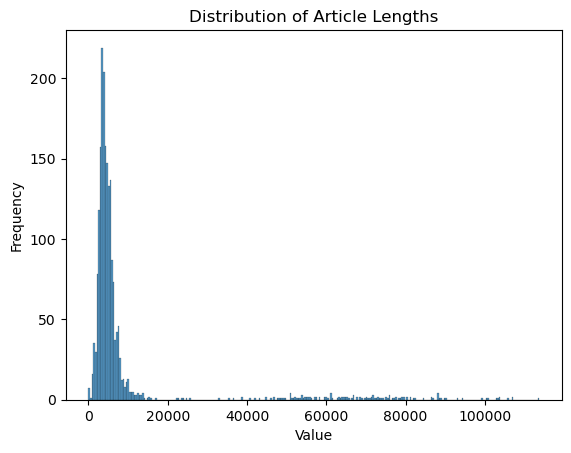

In [7]:
# Using seaborn to plot the distribution
sns.histplot(df['Text_Length'])  

plt.title('Distribution of Article Lengths')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [8]:
df.sort_values('Text_Length', ascending=False).head(50)

,Author,Title,Section,Content,Date,Cleaned_Content,Text_Length
1925,Andrew Sparrow,UK coronavirus live: No 10 uses wrong quote to...,Politics,"<div id=""block-5ebc3f5f8f08a55ecde5971a"" class...",2020-07-01T16:26:47Z,7.42pm BST That’s all for our UK coronavirus l...,113712
1488,Amelia Hill,Chris Whitty warns people to distance despite ...,Politics,"<div id=""block-5eff76718f08ff51fe2ac68a"" class...",2020-07-03T18:54:53Z,7.19pm BST Please follow the global coronaviru...,106912
1735,Andrew Sparrow,UK coronavirus: Hancock urged to act over high...,Politics,"<div id=""block-5ed695e08f084df971c8e77d"" class...",2023-11-24T15:17:51Z,7.10pm BST That’s all for the UK live blog tod...,106844
1934,Andrew Sparrow,"UK coronavirus: recession already happening, s...",Politics,"<div id=""block-5ebaebea8f080c7274539ac8"" class...",2020-08-12T14:10:15Z,7.33pm BST We’re closing this liveblog now. Fo...,105610
1746,Andrew Sparrow,UK coronavirus: Matt Hancock insists contact t...,Politics,"<div id=""block-5ed542488f084df971c8dc3f"" class...",2020-07-01T16:20:03Z,7.02pm BST That’s it for the UK live blog toda...,103640
1620,Andrew Sparrow,Coronavirus UK live: Dowden hints at bailout f...,Politics,"<div id=""block-5eea521e8f08b8bbd22a440e"" class...",2023-11-24T15:17:48Z,6.57pm BST Evening summary A fresh government ...,103623
925,Jessica Murray,UK coronavirus: Boris Johnson says 'there have...,Politics,"<div id=""block-5f6a58788f08ea5eb57be45d"" class...",2023-11-24T15:16:13Z,9.23pm BST Summary That’s it for our live blog...,103438
1943,Frances Perraudin,"'I hope, hope, hope' for a vaccine, but it is ...",Politics,"<div id=""block-5eb9a3e98f08d99d46a15054"" class...",2023-11-24T15:17:54Z,8.14pm BST There is no guarantee of a Covid-19...,102931
1970,Andrew Sparrow,UK coronavirus: official death toll rises to 3...,Politics,"<div id=""block-5eb2e7b78f08a7a22bb3e072"" class...",2020-08-18T10:28:34Z,6.52pm BST Evening summary Boris Johnson will ...,100991
1976,Andrew Sparrow,UK coronavirus: Raab says it would not be safe...,Politics,"<div id=""block-5eb19d688f085c470051ebaa"" class...",2020-07-01T16:31:23Z,7.10pm BST Evening summary The UK coronavirus ...,100346


In [9]:
df.to_csv("../Datasets/TGC/Politics/TGC_Politics.csv")

### Society

In [10]:
section = 'society'  
from_date = '2000-01-01'
to_date = '2020-12-31'

df = create_dataframe(api_key, section, from_date, to_date)
print(df.head())

             Author                                              Title  \
0       Amelia Hill  'We need to preserve the memories': pandemic s...   
1     Sarah Boseley  Covid: GPs to earn £10 per care home resident ...   
2     Simon Goodley  Sir Jim Ratcliffe-owned hotel chain fined over...   
3        Sirin Kale  ‘He prioritised being a dad above everything’:...   
4  Rebecca Smithers  Record number of Britons to take part in dry J...   

   Section                                            Content  \
0  Society  <p>It was lockdown, and months of not being ab...   
1  Society  <p>GPs in England are to be paid an extra £10 ...   
2  Society  <p>A hotel group controlled by the multi-billi...   
3  Society  <p>Paul Smith was known as the quiet man. “He ...   
4  Society  <p>A record number of Britons are planning to ...   

                   Date  
0  2021-01-02T04:37:15Z  
1  2021-01-01T04:36:51Z  
2  2020-12-31T10:37:17Z  
3  2021-03-04T15:49:09Z  
4  2020-12-31T00:01:25Z  


In [11]:
len(np.unique(df['Section']))
#len(df[df['Author']!= "Unknown"])

1

In [12]:
# Applying the cleaning function to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(clean_html_content)

# Calculate the length of the cleaned content
df['Text_Length'] = df['Cleaned_Content'].apply(len)

In [13]:
df.sort_values('Text_Length', ascending=False).head(50)

,Author,Title,Section,Content,Date,Cleaned_Content,Text_Length
1686,Unknown,The Rev Paul Nicolson – a campaigning life in ...,Society,"<p>For more than 20 years, one retired but ind...",2020-09-18T15:16:42Z,"For more than 20 years, one retired but indefa...",44174
1946,Sophie Elmhirst,Tampon wars: the battle to overthrow the Tampa...,Society,"<p>The Queen of Tampons, one of several nickna...",2021-12-21T12:39:18Z,"The Queen of Tampons, one of several nicknames...",35555
1079,Sophie Elmhirst,'You have to take action': one hospital cleane...,Society,"<p>On 9 February, a cold, damp Sunday, an Uber...",2020-07-13T13:00:22Z,"On 9 February, a cold, damp Sunday, an Uber pu...",32618
944,Susan McKay,‘Knowing it could kill you isn’t a deterrent’:...,Society,"<p>On 11 April 2015, Ella Parry stood beside h...",2020-08-14T11:08:52Z,"On 11 April 2015, Ella Parry stood beside her ...",30798
1273,Linda Rodriguez McRobbie,The man in the iron lung,Society,"<p>The summer of 1952 was hot, even by Texas s...",2021-01-06T15:07:21Z,"The summer of 1952 was hot, even by Texas stan...",30388
788,Sirin Kale,Josiane Ekoli was a brilliant nurse and mother...,Society,"<p>After a busy night shift at the hospital, t...",2020-08-19T10:56:55Z,"After a busy night shift at the hospital, ther...",28574
1915,Sarah Boseley,The great vape debate: are e-cigarettes saving...,Society,<p>Gone With the Smoke is already no more than...,2020-02-24T10:54:32Z,Gone With the Smoke is already no more than a ...,28383
814,Sirin Kale,Richie Mawson was a beloved dad and Liverpool ...,Society,<p>No one knows for sure when Richard “Richie”...,2020-08-11T05:00:27Z,No one knows for sure when Richard “Richie” Ma...,27769
314,Jenny Kleeman,'I just want to see the person I always saw in...,Society,<p>When the children at Sophia Drake’s primary...,2021-01-08T12:00:36Z,When the children at Sophia Drake’s primary sc...,27223
691,Sirin Kale,'They were withering away': Why did Colin Harr...,Society,<p>Covid-19 did not come to Skye for a long ti...,2020-09-08T10:57:30Z,"Covid-19 did not come to Skye for a long time,...",26997


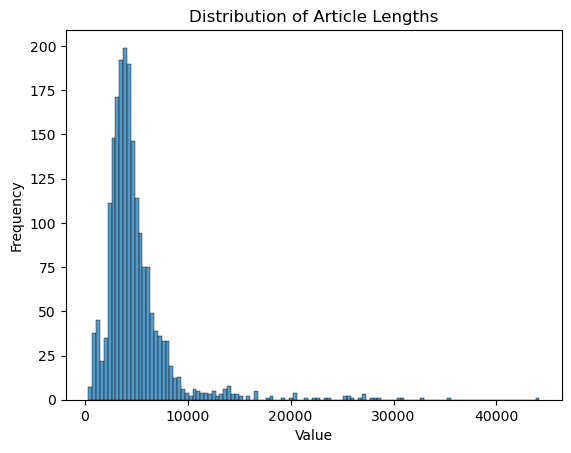

In [14]:
# Using seaborn to plot the distribution
sns.histplot(df['Text_Length'])  

plt.title('Distribution of Article Lengths')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [15]:
df.to_csv("../Datasets/TGC/Society/TGC_Society.csv")

### World

In [16]:
section = 'world'  
from_date = '2000-01-01'
to_date = '2020-12-31'

df = create_dataframe(api_key, section, from_date, to_date)
print(df.head())

                 Author                                              Title  \
0          Nicola Davis  Covid vaccine: chief medical officers defend r...   
1        Amanda Holpuch  Fauci calls for extra resources as US misses C...   
2         Sarah Boseley  Key London hospital preparing for Covid-only c...   
3  Weronika Strzyżyńska  Land subsidence 'will affect almost fifth of g...   
4               Unknown  Covid control lessons from Nicaragua and the I...   

      Section                                            Content  \
0  World news  <p>The UK’s chief medical officers have defend...   
1  World news  <figure class="element element-embed" data-alt...   
2  World news  <p>One of London’s biggest hospitals has warne...   
3  World news  <p>Subsidence, or the gradual sinking of land,...   
4  World news  <p>In learning lessons about how to handle Cov...   

                   Date  
0  2021-01-01T00:08:28Z  
1  2021-01-01T17:27:41Z  
2  2021-01-01T15:14:22Z  
3  2022-10-19T15:4

In [17]:
len(np.unique(df['Section']))
#len(df[df['Author']!= "Unknown"])

1

In [18]:
# Applying the cleaning function to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(clean_html_content)

# Calculate the length of the cleaned content
df['Text_Length'] = df['Cleaned_Content'].apply(len)

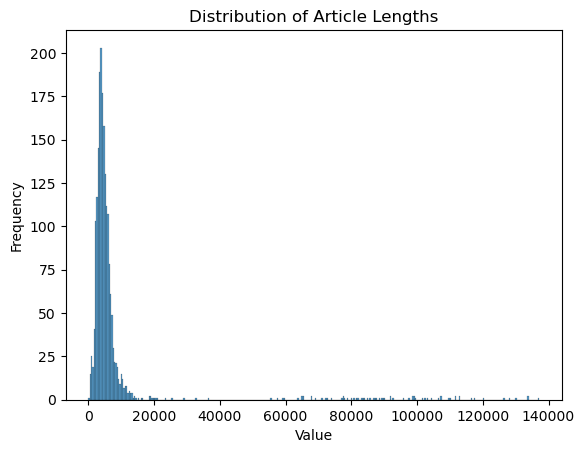

In [19]:
# Using seaborn to plot the distribution
sns.histplot(df['Text_Length'])  

plt.title('Distribution of Article Lengths')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [20]:
df.to_csv("../Datasets/TGC/World/TGC_World.csv")

In [21]:
df.iloc[503]['Cleaned_Content']

'Boris Johnson’s appeal to Britons to slim down in response to the pandemic has not helped most people lose weight, according to new research calling for a far more wide-ranging response to the obesity crisis. Warnings about the potential added risks Covid-19 poses to people with obesity are “largely ineffective”, the study found. It said ministers placed too much emphasis on “individual willpower and not enough on the environmental and economic aspects of obesity”. A Social Market Foundation (SMF) study said bigger obstacles needed to be tackled, such as “food deserts” – areas of more than a million people where poverty, poor transport and a lack of large supermarkets limit access to cheap fruit and vegetables. A survey conducted for SMF found that only 28% of people who describe themselves as living with obesity said they were taking steps to lose weight because of the pandemic. The thinktank found that while this was higher than the 20% of the general population taking steps to lose

### UK News

In [22]:
section = 'uk-news'  
from_date = '2000-01-01'
to_date = '2020-12-31'

df = create_dataframe(api_key, section, from_date, to_date)
print(df.head())

              Author                                              Title  \
0     Lisa O'Carroll  Three-month customs grace period for parcels i...   
1       Harry Taylor  Police in Essex launch manhunt after pensioner...   
2  Alexandra Topping  New Year honours 2021: citizens awarded for re...   
3      Steven Morris  'Happy vaccine day' at Welsh factory proudly p...   
4    Haroon Siddique  UK weather: snow and ice to bring 2020 to wint...   

   Section                                            Content  \
0  UK news  <p>Businesses in Great Britain sending parcels...   
1  UK news  <p>Police have launched a manhunt for a 28-yea...   
2  UK news  <p>Hundreds of key workers and community champ...   
3  UK news  <p>Most of the sprawling industrial estate on ...   
4  UK news  <p>Snow and ice is expected across most of Sco...   

                   Date  
0  2021-01-01T04:36:49Z  
1  2021-01-01T11:49:21Z  
2  2021-01-11T13:29:30Z  
3  2020-12-31T04:36:48Z  
4  2020-12-31T04:36:49Z  


In [23]:
len(np.unique(df['Section']))
#len(df[df['Author']!= "Unknown"])

1

In [24]:
# Applying the cleaning function to the 'Content' column
df['Cleaned_Content'] = df['Content'].apply(clean_html_content)

# Calculate the length of the cleaned content
df['Text_Length'] = df['Cleaned_Content'].apply(len)

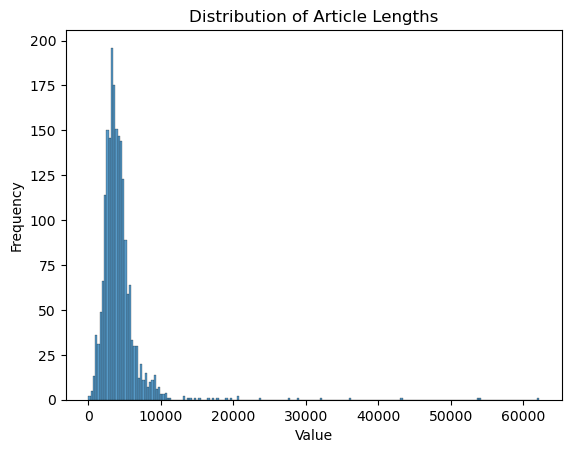

In [25]:
# Using seaborn to plot the distribution
sns.histplot(df['Text_Length'])  

plt.title('Distribution of Article Lengths')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [26]:
df.to_csv("../Datasets/TGC/UK/TGC_UK.csv")